In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [6]:
title = "NBA Players - Basic Season Stats (1950-2017).xlsx"

In [7]:
data = pd.read_excel(title)

In [8]:
data.head()

,#,Season Start,Player Name,Player Salary in $,Salary in 2019 Dollars,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,32.0,1950.0,Al Cervi*,NaN,NaN,PG,32.0,SYR,56.0,NaN,...,0.829,NaN,NaN,NaN,264.0,NaN,NaN,NaN,223.0,573.0
1,85.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,TOT,57.0,NaN,...,0.560,NaN,NaN,NaN,95.0,NaN,NaN,NaN,143.0,214.0
2,86.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,DNN,41.0,NaN,...,0.532,NaN,NaN,NaN,85.0,NaN,NaN,NaN,116.0,197.0
3,87.0,1950.0,Al Guokas,NaN,NaN,F-G,24.0,PHW,16.0,NaN,...,1.000,NaN,NaN,NaN,10.0,NaN,NaN,NaN,27.0,17.0
4,174.0,1950.0,Al Miksis,NaN,NaN,C,21.0,WAT,8.0,NaN,...,0.810,NaN,NaN,NaN,4.0,NaN,NaN,NaN,22.0,27.0


In [9]:
cleaned = data.dropna()


In [10]:
cleaned.head()

,#,Season Start,Player Name,Player Salary in $,Salary in 2019 Dollars,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5701,9688.0,1990.0,A.C. Green,1750000,3.406408e+06,PF,26.0,LAL,82.0,82.0,...,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
5702,10166.0,1991.0,A.C. Green,1750000,3.268851e+06,PF,27.0,LAL,82.0,21.0,...,0.738,201.0,315.0,516.0,71.0,59.0,23.0,99.0,117.0,750.0
5703,10617.0,1992.0,A.C. Green,1750000,3.173325e+06,PF,28.0,LAL,82.0,53.0,...,0.744,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0
5704,11060.0,1993.0,A.C. Green,1885000,3.318774e+06,PF,29.0,LAL,82.0,55.0,...,0.739,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
5705,11529.0,1994.0,A.C. Green,6472600,1.111130e+07,PF,30.0,PHO,82.0,55.0,...,0.735,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0


In [11]:
s = cleaned['Salary in 2019 Dollars']
pd.to_numeric(s, downcast='float')
cleaned.dtypes

#                         float64
Season Start              float64
Player Name                object
Player Salary in $         object
Salary in 2019 Dollars    float64
Pos                        object
Age                       float64
Tm                         object
G                         float64
GS                        float64
MP                        float64
PER                       float64
TS%                       float64
3PAr                      float64
FTr                       float64
ORB%                      float64
DRB%                      float64
TRB%                      float64
AST%                      float64
STL%                      float64
BLK%                      float64
TOV%                      float64
USG%                      float64
OWS                       float64
DWS                       float64
WS                        float64
WS/48                     float64
OBPM                      float64
DBPM                      float64
BPM           

In [12]:
#feature selection
X = cleaned.iloc[:,6:]
y = cleaned['Salary in 2019 Dollars']
columnsDrop = ['TRB','FT','FTA','MP','2P','2PA','Tm', 'TOV','TOV%', 'VORP', 'USG%', 'BPM','WS/48', 'WS', 'OWS','DWS','USG%']

In [13]:
# I dont need team names
X.drop(columns = columnsDrop, inplace = True)

In [14]:
# ready for the train test split
X.head()

,Age,G,GS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,PF,PTS
5701,26.0,82.0,82.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,...,0.489,0.486,0.751,262.0,450.0,90.0,66.0,50.0,207.0,1061.0
5702,27.0,82.0,21.0,13.8,0.556,0.101,0.557,11.3,16.2,13.8,...,0.507,0.486,0.738,201.0,315.0,71.0,59.0,23.0,117.0,750.0
5703,28.0,82.0,53.0,16.7,0.556,0.070,0.569,11.8,18.2,14.9,...,0.495,0.483,0.744,306.0,456.0,117.0,91.0,36.0,141.0,1116.0
5704,29.0,82.0,55.0,16.3,0.603,0.065,0.531,11.5,17.3,14.4,...,0.550,0.548,0.739,287.0,424.0,116.0,88.0,39.0,149.0,1051.0
5705,30.0,82.0,55.0,17.0,0.555,0.038,0.391,11.1,18.8,15.0,...,0.513,0.506,0.735,275.0,478.0,137.0,70.0,38.0,142.0,1204.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
model = LinearRegression(fit_intercept=True, )
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print(model.intercept_)
print(model.coef_)
print(model.get_params())

2410762.553443947
[ 1.90861484e+05 -5.47455016e+04  2.73798905e+04  6.98262762e+05
 -4.09121312e+07 -1.17150112e+05  3.51170599e+06 -5.76638229e+05
 -5.80418680e+05  9.45144064e+05  5.80802595e+03 -1.02536615e+06
 -1.39132683e+03 -3.69924671e+05  6.50714278e+05 -7.43709686e+03
 -5.45185443e+02 -3.17350284e+05 -1.60599689e+04  1.62457801e+04
 -2.12718048e+05  2.20218954e+05  2.25215114e+07  1.62208213e+06
 -1.17615355e+04  1.60704205e+04 -8.29710880e+02 -2.00755179e+04
 -1.70210941e+04 -1.88806133e+02  4.67533036e+03]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [18]:
y_pred = model.predict(X_test)

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")
#this is a bad score

R2 Score: 0.45792904535891976


In [19]:
p = pd.DataFrame({model.intercept_:model.coef_})
print(f"{model.intercept_} = {model.coef_}")

2226504.014598307 = [ 1.93822951e+05 -5.45375518e+04  2.63997103e+04  6.81395555e+05
 -3.05216428e+07  1.75900871e+05  2.68231804e+06 -4.93031835e+05
 -4.76786754e+05  7.69463778e+05  9.16371061e+03 -1.06121243e+06
 -7.11989735e+04 -3.44362900e+05  6.38151107e+05 -9.06688811e+03
  1.18938987e+03  7.21007339e+05 -1.73113744e+04  1.59712637e+04
 -1.61105375e+04  6.25850657e+05  1.22708532e+07  6.94424410e+05
 -1.13360856e+04  1.50660120e+04 -1.33161668e+03 -1.74653831e+04
 -1.14380420e+04 -1.25333511e+03  4.01747373e+03]


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

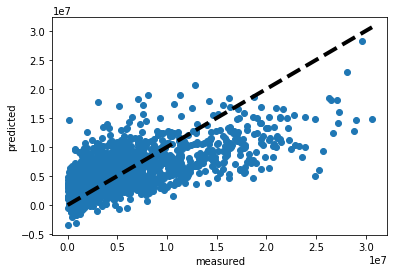

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [22]:
cleaned.keys()

Index(['#', 'Season Start', 'Player Name', 'Player Salary in $',
       'Salary in 2019 Dollars', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [23]:
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Salary in 2019 Dollars   R-squared:                       0.458
Model:                                OLS   Adj. R-squared:                  0.456
Method:                     Least Squares   F-statistic:                     252.6
Date:                    Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                            20:38:20   Log-Likelihood:            -1.5451e+05
No. Observations:                    9301   AIC:                         3.091e+05
Df Residuals:                        9269   BIC:                         3.093e+05
Df Model:                              31                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.227e+06   1.11e+06      1.999      0.046    4.28e+04    4.41e+06
Age         1.938e+05   1.08e+04     17.895      0.000    1.73e+05    2.15e+05
G          -5.454e+04   3970.512    -13.736      0.000   -6.23e+04   -4.68e+04
GS           2.64e+04   2857.584      9.238      0.000    2.08e+04     3.2e+04
PER         6.814e+05   4.64e+04     14.692      0.000     5.9e+05    7.72e+05
TS%        -3.052e+07   5.04e+06     -6.060      0.000   -4.04e+07   -2.06e+07
3PAr        1.759e+05   1.75e+06      0.100      0.920   -3.26e+06    3.61e+06
FTr         2.682e+06   6.65e+05      4.033      0.000    1.38e+06    3.99e+06
ORB%        -4.93e+05   1.87e+05     -2.643      0.008   -8.59e+05   -1.27e+05
DRB%       -4.768e+05   1.77e+05     -2.698      0.007   -8.23e+05    -1.3e+05
TRB%        7.695e+05   3.59e+05      2.141      0.032     6.5e+04    1.47e+06
AST%        9163.7106   1.14e+04      0.804      0.422   -1.32e+04    3.15e+04
STL%       -1.061e+06   1.13e+05     -9.408      0.000   -1.28e+06    -8.4e+05
BLK%        -7.12e+04   8.11e+04     -0.878      0.380    -2.3e+05    8.78e+04
OBPM       -3.444e+05   6.47e+04     -5.324      0.000   -4.71e+05   -2.18e+05
DBPM        6.382e+05   5.12e+04     12.458      0.000    5.38e+05    7.39e+05
FG         -9066.8881   4050.750     -2.238      0.025    -1.7e+04   -1126.528
FGA         1189.3899   1522.933      0.781      0.435   -1795.895    4174.674
FG%          7.21e+05   1.09e+07      0.066      0.947   -2.06e+07    2.21e+07
3P         -1.731e+04   8935.838     -1.937      0.053   -3.48e+04     204.834
3PA         1.597e+04   3709.298      4.306      0.000    8700.224    2.32e+04
3P%        -1.611e+04   3.44e+05     -0.047      0.963    -6.9e+05    6.58e+05
2P%         6.259e+05   2.14e+06      0.292      0.770   -3.57e+06    4.82e+06
eFG%        1.227e+07   9.41e+06      1.304      0.192   -6.17e+06    3.07e+07
FT%         6.944e+05   6.74e+05      1.031      0.303   -6.26e+05    2.01e+06
ORB        -1.134e+04   2302.400     -4.924      0.000   -1.58e+04   -6822.876
DRB         1.507e+04   1270.741     11.856      0.000    1.26e+04    1.76e+04
AST        -1331.6167    899.447     -1.480      0.139   -3094.732     431.498
STL        -1.747e+04   3330.197     -5.245      0.000    -2.4e+04   -1.09e+04
BLK        -1.144e+04   3026.853     -3.779      0.000   -1.74e+04   -5504.744
PF         -1253.3351   1481.861     -0.846      0.398   -4158.108    1651.438
PTS         4017.4737   1151.402      3.489      0.000    1760.473    6274.474
==============================================================================
Omnibus:                     2302.812   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8476.768
Skew:                           1.205

([<matplotlib.axis.YTick at 0x1c216892b0>,
 <a list of 32 Text yticklabel objects>)

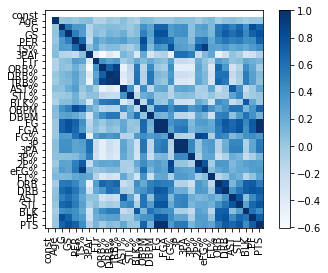

In [24]:
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)

In [65]:
model.coef_[1]

26902.878931239746